In [1]:
# Import packages
import biosppy
import pyhrv
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl
import numpy as np
import pandas as pd

In [900]:
signal = np.loadtxt("csv_5/Normal/77.csv")[:]

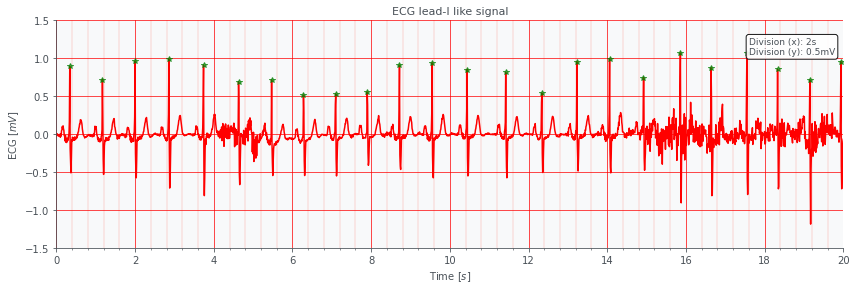

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [901]:
import pyhrv.tools as tools

# Plot the ECG signal (interval: 0s to 20s)
tools.plot_ecg(signal, sampling_rate=100, interval=[0, 20])

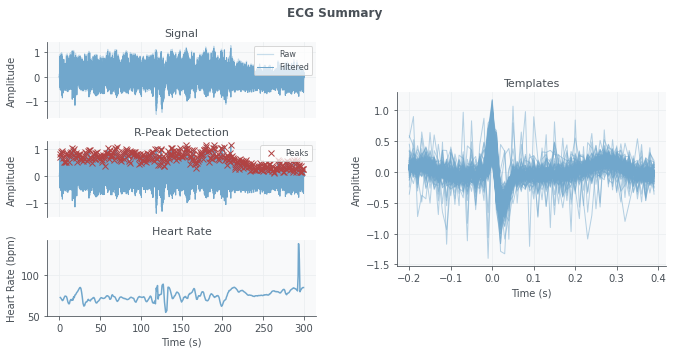

In [902]:
# Get R-peaks series using biosppy
t, filtered_signal, rpeaks = biosppy.signals.ecg.ecg(signal, sampling_rate=100)[:3]

In [903]:
results = td.hr_parameters(rpeaks=t[rpeaks])
hr_mean_value = results["hr_mean"]
df_hr_mean = pd.DataFrame({"HR": [hr_mean_value]})
hr_mean_value

75.88608332733457

In [904]:
results = td.sdnn(rpeaks=t[rpeaks])
sdnn_value = results["sdnn"]
df_sdnn = pd.DataFrame({"SDNN": [sdnn_value]})
sdnn_value

92.09869476927207

In [905]:
results = td.rmssd(rpeaks=t[rpeaks])
rmssd_value = results["rmssd"]
df_rmssd = pd.DataFrame({"RMSSD": [rmssd_value]})
rmssd_value

88.78829969180715

In [906]:
results = td.sdsd(rpeaks=t[rpeaks])
sdsd_value = results["sdsd"]
df_sdsd = pd.DataFrame({"SDSD": [sdsd_value]})
sdsd_value

82.2321076840933

In [907]:
results = td.nn50(rpeaks=t[rpeaks])
pnn50_value = results["pnn50"]
df_pnn50 = pd.DataFrame({"pNN50": [pnn50_value]})
pnn50_value

12.702702702702704

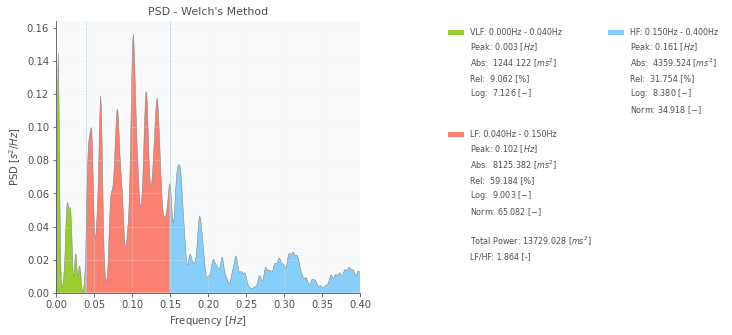

In [908]:
result = fd.welch_psd(rpeaks=t[rpeaks])
result = result["fft_ratio"]
LFHF_Ratio = result
df_LFHF_Ratio = pd.DataFrame({"LF/HF": [LFHF_Ratio]})

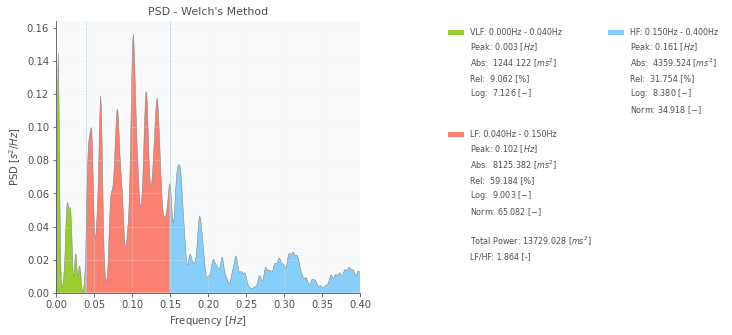

In [909]:
result = fd.welch_psd(rpeaks=t[rpeaks], show=False)
result = result["fft_peak"]
LF = result[1]
HF = result[2]
df_lf = pd.DataFrame({"LF": [LF]})
df_hf = pd.DataFrame({"HF": [HF]})

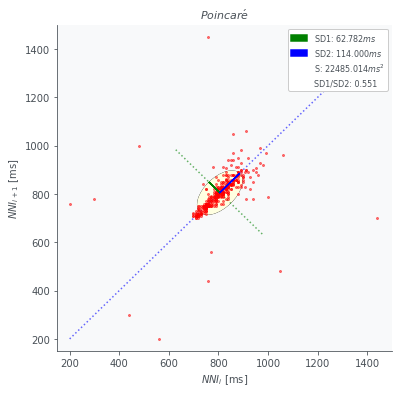

In [910]:
results = nl.poincare(rpeaks=t[rpeaks])
sd1_value = results["sd1"]
sd2_value = results["sd2"]
sd_ratio_value = results["sd_ratio"]
df_sd1 = pd.DataFrame({"SD1": [sd1_value]})
df_sd2 = pd.DataFrame({"SD2": [sd2_value]})
df_sd_ratio = pd.DataFrame({"SD_ratio": [sd_ratio_value]})

In [911]:
df_result = pd.concat(
    [
        df_hr_mean,
        df_sdnn,
        df_rmssd,
        df_sdsd,
        df_pnn50,
        df_lf,
        df_hf,
        df_LFHF_Ratio,
        df_sd1,
        df_sd2,
        df_sd_ratio,
    ],
    axis=1,
)
df1 = pd.DataFrame(df_result)
df1

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio
0,75.886083,92.098695,88.7883,82.232108,12.702703,0.101562,0.161133,1.863823,62.78239,114.000157,1.815798


In [912]:
reader = pd.read_excel("new_fitur.xlsx")
print(len(reader))
with pd.ExcelWriter(
    "new_fitur.xlsx", mode="a", if_sheet_exists="overlay", engine="openpyxl"
) as writer:
    df1.to_excel(writer, index=False, header=False, startrow=len(reader) + 1)

print("done")

147
done
